In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
# Load the dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

In [4]:
# Add column names to the dataset
data.columns = ['id_number', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
                'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
                'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
                'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
                'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
                'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
                'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [5]:
# Drop the id_number column as it is not relevant to the analysis
data.drop('id_number', axis=1, inplace=True)

In [6]:
# Encode the diagnosis column to binary values
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [7]:
# Summary of the dataset
print("Dataset Shape: ", data.shape)
print("\nFeatures: \n", data.columns.tolist())
print("\nMissing values : ", data.isnull().sum().values.sum())
print("\nUnique values : \n", data.nunique())

Dataset Shape:  (569, 31)

Features: 
 ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

Missing values :  0

Unique values : 
 diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave_points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se            

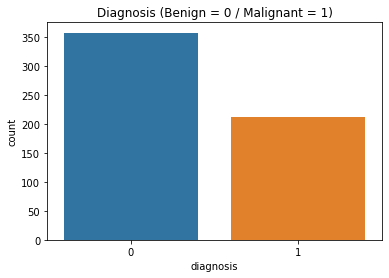

In [8]:
# Distribution of the target variable
sns.countplot(x='diagnosis', data=data)
plt.title('Diagnosis (Benign = 0 / Malignant = 1)')
plt.show()

In [9]:
#Removal of outlier:

data1 = data.copy()

for i in [i for i in data.columns]:
    if data[i].nunique()>=12:
        Q1 = data[i].quantile(0.15)
        Q3 = data[i].quantile(0.85)
        IQR = Q3 - Q1
        data = data[data[i] <= (Q3+(1.5*IQR))]
        data = data[data[i] >= (Q1-(1.5*IQR))]
data = data.reset_index(drop=True)
display(data.head())
print('\n\033[1mInference:\033[0m Before removal of outliers, The dataset had {} samples.'.format(data1.shape[0]))
print('\033[1mInference:\033[0m After removal of outliers, The dataset now has {} samples.'.format(data.shape[0]))

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
3,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
4,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368



Inference: Before removal of outliers, The dataset had 569 samples.
Inference: After removal of outliers, The dataset now has 502 samples.


In [10]:
# Split the data into features (X) and target (y)
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
# Predict the test set
y_pred = knn.predict(X_test)

In [15]:
# Evaluate the model
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test, y_pred))

Confusion Matrix: 
 [[60  4]
 [ 6 31]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.94      0.92        64
           1       0.89      0.84      0.86        37

    accuracy                           0.90       101
   macro avg       0.90      0.89      0.89       101
weighted avg       0.90      0.90      0.90       101



In [16]:
from sklearn.metrics import accuracy_score

accuracy = knn.score(X_test, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.900990099009901
